Question 1.

In [48]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Load the dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Filter out rows with NaN values for flipper_length_mm and species
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Define a function to compute statistics
def compute_stats(data):
    mean = data.mean()
    median = data.median()
    min_val = data.min()
    max_val = data.max()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    std = data.std()
    two_std_range = (mean - 2 * std, mean + 2 * std)
    return mean, median, min_val, max_val, q1, q3, two_std_range

# Get the list of species
species_list = penguins['species'].unique()

# Set consistent x-axis range
x_range = [penguins['flipper_length_mm'].min() - 5, penguins['flipper_length_mm'].max() + 5]

# Create subplots: one for each species
fig = make_subplots(rows=len(species_list), cols=1, shared_xaxes=True, subplot_titles=species_list)

# Define colors for each species to differentiate the annotations
color_map = {
    'Adelie': 'blue',
    'Chinstrap': 'green',
    'Gentoo': 'orange'
}

# Loop through each species and plot the histogram
for i, species in enumerate(species_list):
    species_data = penguins[penguins['species'] == species]['flipper_length_mm']
    
    # Compute statistics for the species
    mean, median, min_val, max_val, q1, q3, two_std_range = compute_stats(species_data)
    
    # Add the histogram for the species to its own subplot
    fig.add_trace(go.Histogram(x=species_data, name=f'{species} histogram', opacity=0.75, marker_color=color_map[species]), row=i+1, col=1)
    
    # Add vertical lines for mean and median
    fig.add_vline(x=mean, line=dict(color='blue', width=2, dash='dash'), row=i+1, col=1)
    fig.add_vline(x=median, line=dict(color='green', width=2, dash='dash'), row=i+1, col=1)

    # Add rectangles for range, IQR, and 2 std range
    fig.add_vrect(x0=min_val, x1=max_val, fillcolor="yellow", opacity=0.2, layer="below", line_width=0, row=i+1, col=1)
    fig.add_vrect(x0=q1, x1=q3, fillcolor="red", opacity=0.2, layer="below", line_width=0, row=i+1, col=1)
    fig.add_vrect(x0=two_std_range[0], x1=two_std_range[1], fillcolor="purple", opacity=0.2, layer="below", line_width=0, row=i+1, col=1)

    # Create annotations for the legend (statistical information)
    y_pos = 1 - (i * 0.3)  # Control the vertical position of each species' stats on the right side
    fig.add_annotation(
        text=f"<b>{species} Stats:</b><br>Mean: {mean:.1f}<br>Median: {median:.1f}<br>Range: {min_val:.1f} - {max_val:.1f}<br>IQR: {q1:.1f} - {q3:.1f}<br>2 Std Dev: {two_std_range[0]:.1f} - {two_std_range[1]:.1f}",
        xref="paper", yref="paper",
        x=1.05, y=y_pos,  # Position the annotation outside the plot
        showarrow=False,
        align="left",
        bordercolor="black", borderwidth=1,
        bgcolor="white", opacity=0.8
    )

# Update layout to have consistent scaling and show x-axes on every graph
fig.update_layout(
    title="Flipper Length (mm) Distribution by Species",
    xaxis_title="Flipper Length (mm)",
    yaxis_title="Count",
    plot_bgcolor="white",   # Set plot background to white
    paper_bgcolor="white",  # Set paper background to white
    font=dict(color="black"),  # Black text for contrast
    showlegend=False,         # Hide the legend (lines are directly on the plot)
    height=800,               # Adjust height to fit all subplots
    xaxis=dict(range=x_range), # Ensure consistent x-axis range across subplots
    margin=dict(l=40, r=200)   # Increase right margin to fit the legend annotations
)

# Ensure all y-axes have the same scale
fig.update_yaxes(matches='y')

# Show the figure
fig.show()


Question 2.

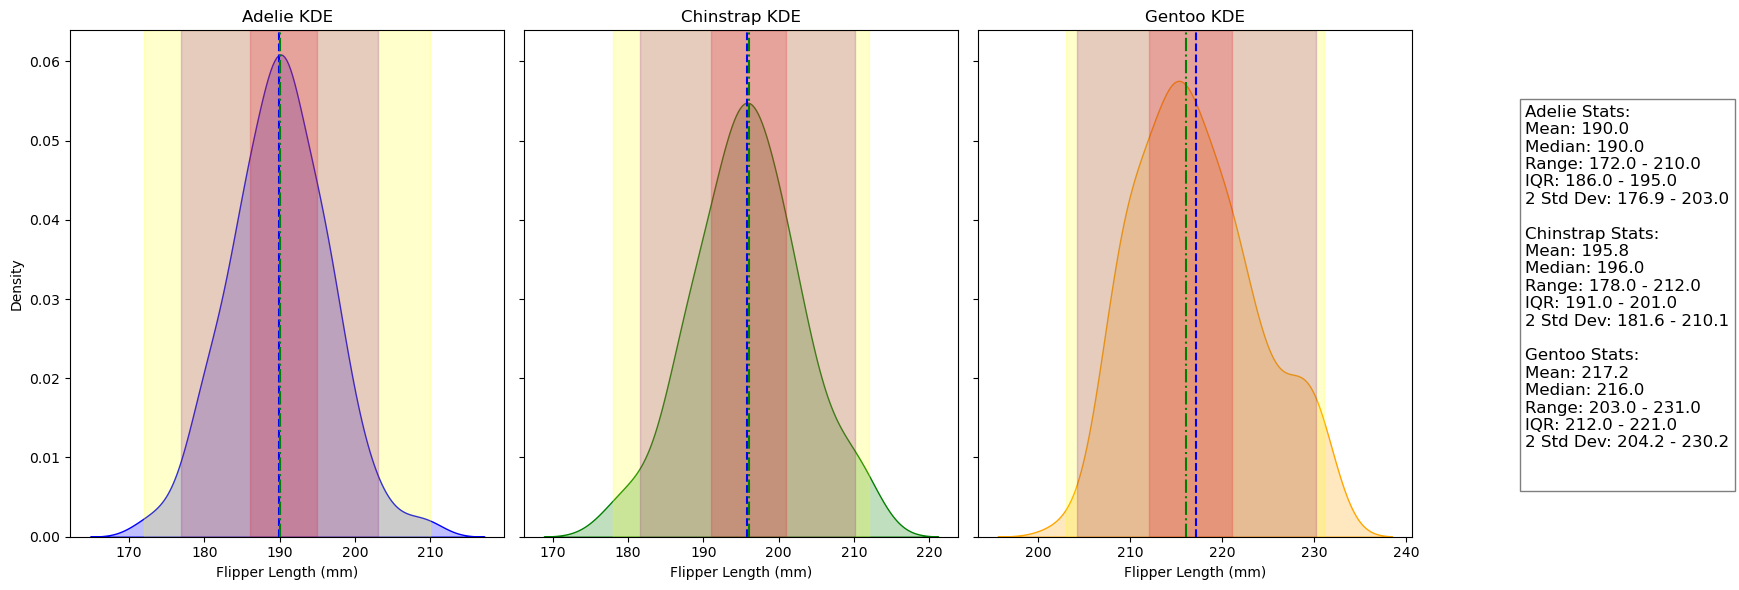

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Filter out rows with NaN values for flipper_length_mm and species
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Define a function to compute statistics
def compute_stats(data):
    mean = data.mean()
    median = data.median()
    min_val = data.min()
    max_val = data.max()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    std = data.std()
    two_std_range = (mean - 2 * std, mean + 2 * std)
    return mean, median, min_val, max_val, q1, q3, two_std_range

# Get the list of species
species_list = penguins['species'].unique()

# Set up the figure with three subplots (one for each species)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Define colors for each species
color_map = {
    'Adelie': 'blue',
    'Chinstrap': 'green',
    'Gentoo': 'orange'
}

# Loop through each species and plot KDE
for i, species in enumerate(species_list):
    species_data = penguins[penguins['species'] == species]['flipper_length_mm']
    
    # Compute statistics for the species
    mean, median, min_val, max_val, q1, q3, two_std_range = compute_stats(species_data)
    
    # Plot KDE for the species
    sns.kdeplot(species_data, ax=axes[i], color=color_map[species], fill=True)
    
    # Set titles and labels for the subplots
    axes[i].set_title(f"{species} KDE")
    axes[i].set_xlabel("Flipper Length (mm)")
    
    # Draw vertical lines for mean and median
    axes[i].axvline(mean, color='blue', linestyle='--', label='Mean')
    axes[i].axvline(median, color='green', linestyle='-.', label='Median')

    # Add rectangle patches for range, IQR, and 2 std range
    axes[i].axvspan(min_val, max_val, color="yellow", alpha=0.2, label='Range')
    axes[i].axvspan(q1, q3, color="red", alpha=0.2, label='IQR')
    axes[i].axvspan(two_std_range[0], two_std_range[1], color="purple", alpha=0.2, label='2 Std Dev')

# Global adjustments
plt.tight_layout(rect=[0, 0, 0.8, 1])

# Add a legend to the side for statistical information
stats_legend_text = ""
for species in species_list:
    species_data = penguins[penguins['species'] == species]['flipper_length_mm']
    mean, median, min_val, max_val, q1, q3, two_std_range = compute_stats(species_data)
    
    stats_legend_text += (f"{species} Stats:\n"
                          f"Mean: {mean:.1f}\n"
                          f"Median: {median:.1f}\n"
                          f"Range: {min_val:.1f} - {max_val:.1f}\n"
                          f"IQR: {q1:.1f} - {q3:.1f}\n"
                          f"2 Std Dev: {two_std_range[0]:.1f} - {two_std_range[1]:.1f}\n\n")

# Display the legend text
plt.gcf().text(0.85, 0.5, stats_legend_text, fontsize=12, va='center', ha='left', bbox=dict(facecolor='white', alpha=0.5))

# Show the plot
plt.show()



chatgpt link: https://chatgpt.com/c/66f388ed-6268-8007-a1fa-a69047d10b6b and summary for question 1 & 2: In this conversation, we worked on visualizing penguin flipper length distributions. Initially, we tried to create histograms with annotations, but after adjustments for clarity, we switched to using Seaborn's KDE plots. We displayed the statistical information (mean, median, range, etc.) in a side legend rather than directly on the plots, and organized the visualizations into three side-by-side subplots, one for each penguin species.

Question 3.
While each data distribution visualization is useful for displaying different data depending on what is more important to be easily noticeable, I prefer a kernel density estimator because it is like a histogram but the trends/data is shown better. The trend is smoother and easier to follow since it is continuous; this allows for a better understanding of the distribution of the data compared to a histogram which has a discrete trend.

Question 4. 

In [3]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Which datasets have similar means and similar variances?
- B and C

Which datasets have similar means but quite different variances
- A and B

Which datasets have similar variances but quite different means
- C and D

Which datasets have quite different means and quite different variances
- A and D


chatgpt link:https://chatgpt.com/c/66f58360-9100-8007-95db-57da5dd35403 and summary for question 3 & 4: We analyzed four datasets to determine which have similar means and variances. Datasets data2 and data3 have similar means (both around 5) and variances, while data1 shares a similar mean but has a much higher variance. Dataset data4 has a different mean (6) and a much lower variance

Question 5.
Right skew: There is a tail of higher values of data on the right that make the mean greater then the median because the mean is sensitive to outliers, which are the higher values in the tail. The median is less affected by the skews and so it is closer to the bulk of the data on the left side.

Left skew: There is a tail of lower values of data on the left that make the mean less than the median because the mean is pulled to the side of the outliers due to it's sensitivity. The median is less affected by the skews and so it is closer to the bulk of the data on the right side.

In terms of the code provided, sample1 is right skewed and sample2 = -sample1 and is therefore left skewed. By negating sample1, we get the mirror of the data in sample2. 

chatgpt link:https://chatgpt.com/c/66f5f74e-38e0-8007-beb2-4f6114e9c3c5 and summary: We discussed a Python code that generates random data from a Gamma distribution, plots a histogram using Plotly, and calculates the mean and median. An error occurred because Plotly Express (px) was not imported, which was resolved by adding the correct import statement. Lastly, we clarified that the code should produce a histogram and display the mean and median when print statements and fig1.show() are added.

Question 6.

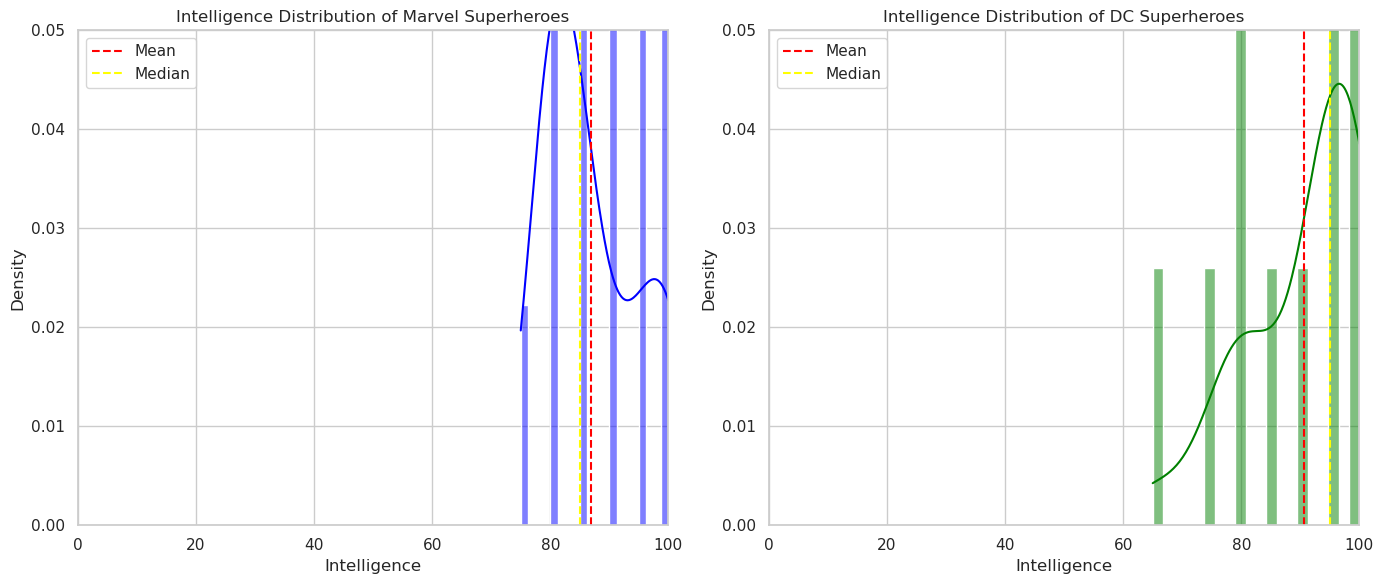

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'https://raw.githubusercontent.com/steview-d/superhero-dashboard/master/static/data/superheroData.csv'
data = pd.read_csv(url)

# Remove rows with missing values
cleaned_data = data.dropna()

# Filter data for Marvel and DC
marvel_data = cleaned_data[cleaned_data['Publisher'] == 'Marvel Comics']
dc_data = cleaned_data[cleaned_data['Publisher'] == 'DC Comics']

# Calculate mean and median for both publishers
marvel_mean = marvel_data['Intelligence'].mean()
marvel_median = marvel_data['Intelligence'].median()
dc_mean = dc_data['Intelligence'].mean()
dc_median = dc_data['Intelligence'].median()

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure with two subplots
plt.figure(figsize=(14, 6))

# Create a histogram for Marvel
plt.subplot(1, 2, 1)
sns.histplot(marvel_data['Intelligence'], bins=20, kde=True, color='blue', stat='density')
plt.title('Intelligence Distribution of Marvel Superheroes')
plt.xlabel('Intelligence')
plt.ylabel('Density')
plt.xlim(0, 100)
plt.ylim(0, 0.05)

# Add mean and median lines for Marvel
plt.axvline(marvel_mean, color='red', linestyle='--', label='Mean')
plt.axvline(marvel_median, color='yellow', linestyle='--', label='Median')
plt.legend()

# Create a histogram for DC
plt.subplot(1, 2, 2)
sns.histplot(dc_data['Intelligence'], bins=20, kde=True, color='green', stat='density')
plt.title('Intelligence Distribution of DC Superheroes')
plt.xlabel('Intelligence')
plt.ylabel('Density')
plt.xlim(0, 100)
plt.ylim(0, 0.05)

# Add mean and median lines for DC
plt.axvline(dc_mean, color='red', linestyle='--', label='Mean')
plt.axvline(dc_median, color='yellow', linestyle='--', label='Median')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


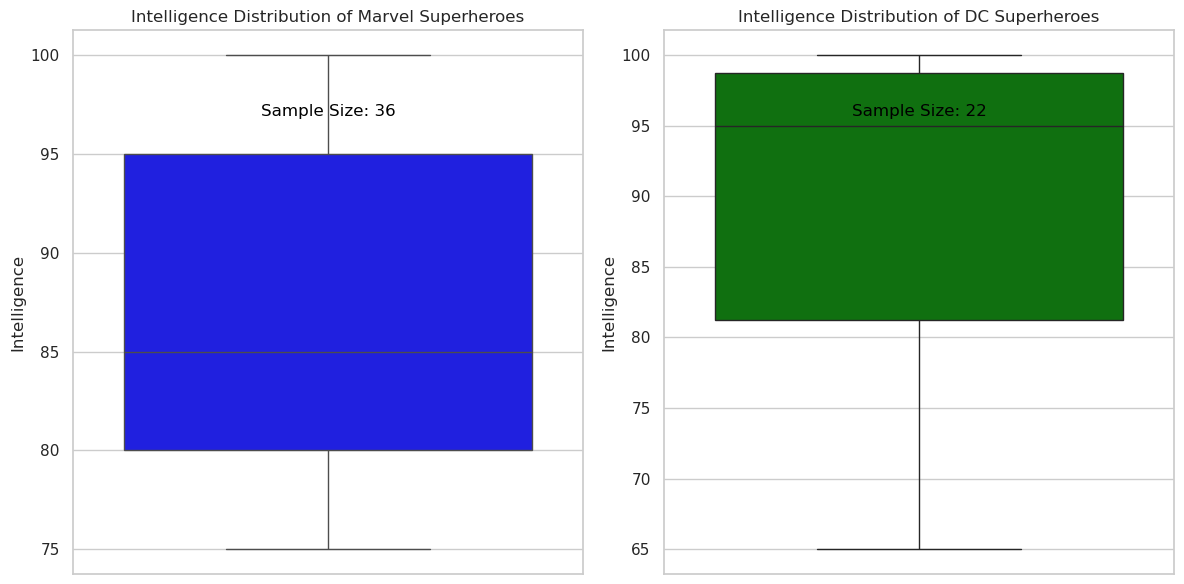

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'https://raw.githubusercontent.com/steview-d/superhero-dashboard/master/static/data/superheroData.csv'
data = pd.read_csv(url)

# Remove rows with missing values
cleaned_data = data.dropna()

# Filter data for Marvel and DC
marvel_data = cleaned_data[cleaned_data['Publisher'] == 'Marvel Comics']
dc_data = cleaned_data[cleaned_data['Publisher'] == 'DC Comics']

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure
plt.figure(figsize=(12, 6))

# Create a box plot for Marvel
plt.subplot(1, 2, 1)
sns.boxplot(y=marvel_data['Intelligence'], color='blue')
plt.title('Intelligence Distribution of Marvel Superheroes')
plt.ylabel('Intelligence')
plt.xticks([])  # Hide x ticks as it's a single variable

# Add sample size for Marvel, positioned lower
sample_size_marvel = len(marvel_data)
plt.text(0.5, 0.85, f'Sample Size: {sample_size_marvel}', 
         horizontalalignment='center', verticalalignment='center', 
         transform=plt.gca().transAxes, fontsize=12, color='black')

# Create a box plot for DC
plt.subplot(1, 2, 2)
sns.boxplot(y=dc_data['Intelligence'], color='green')
plt.title('Intelligence Distribution of DC Superheroes')
plt.ylabel('Intelligence')
plt.xticks([])  # Hide x ticks as it's a single variable

# Add sample size for DC, positioned lower
sample_size_dc = len(dc_data)
plt.text(0.5, 0.85, f'Sample Size: {sample_size_dc}', 
         horizontalalignment='center', verticalalignment='center', 
         transform=plt.gca().transAxes, fontsize=12, color='black')

# Show the plots
plt.tight_layout()
plt.show()


chatgpt link(so sorry I couldn't get the link because I wasn't logged in but I put the chat history on a google doc): https://docs.google.com/document/d/1p682XImiG1_M01o8y36WwSmQzSHfQLNF3MQFy5jDuE4/edit and summary: Analyzed a superhero dataset.
Created histograms for Marvel and DC intelligence distributions.
Removed missing values.
Generated box plots with sample size annotations.

Question 7.

In [38]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,100])

Question 8.

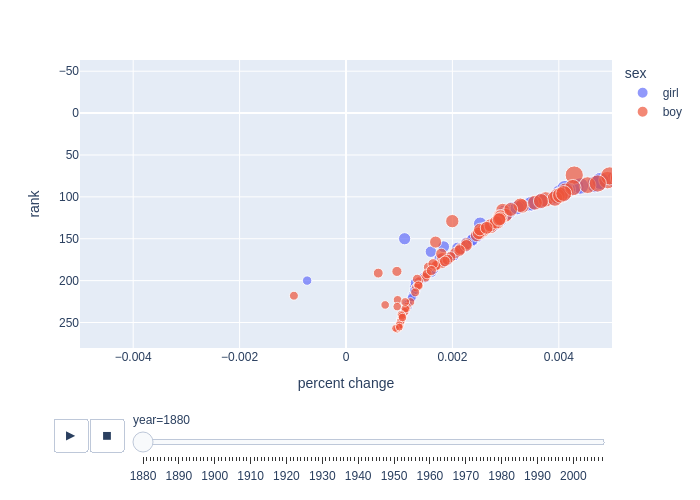

In [45]:
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name",size_max=50, range_x=[-0.005,0.005]) # range_y removed
fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Question 9.
Mostly